## importing libararies

In [1]:
import pickle
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [11]:
dir = 'C:\\Users\\Shishir\\data'
with open(dir+'\\train_image.pkl', 'rb') as f:
    train_image = pickle.load(f)
    
with open(dir+'\\train_label.pkl', 'rb') as f:
    train_label = pickle.load(f)
    
with open(dir+'\\test_image.pkl', 'rb') as f:
    test_image = pickle.load(f)

In [12]:
type(train_image)

list

In [13]:
len(train_image)

8000

In [14]:
len(train_image[0])

784

In [15]:
img = train_image[0]
img = np.array(img).reshape(28, 28)

## data visualization

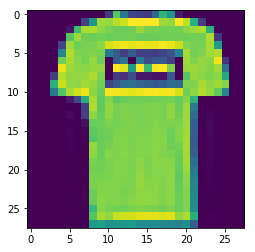

In [16]:
imshow(np.asarray(img))

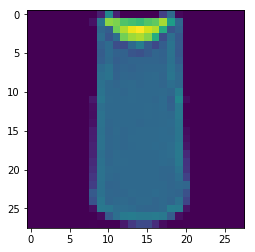

In [17]:
img = train_image[1]
img = np.array(img).reshape(28, 28)
imshow(np.asarray(img))

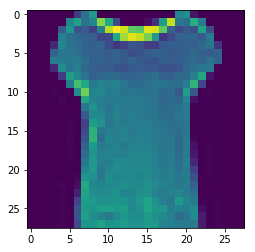

In [18]:
img = train_image[100]
img = np.array(img).reshape(28, 28)
imshow(np.asarray(img))

In [19]:
train_image = np.array(train_image)

In [20]:
train_image.shape

(8000, 784)

In [21]:
type(train_image)

numpy.ndarray

In [22]:
type(train_label)

list

In [23]:
len(train_label)

8000

In [24]:
train_label = np.array(train_label)

In [25]:
type(train_label)

numpy.ndarray

In [26]:
type(test_image)

list

In [27]:
len(test_image)

2000

In [28]:
test_image = np.array(test_image)

In [29]:
test_image.shape

(2000, 784)

## data normalization, so that each data point have similiar distribution so that our model will converge faster. Moreover, as we are going to apply logistic regression normalization prevents sigmoid to explode to very large values.

In [30]:
#normalization
train_image = train_image.astype(np.float32)
train_image/=255

In [31]:
test_image = test_image.astype(np.float32)
test_image/=255

In [32]:
# # shuffling data
# rng_state = np.random.get_state()
# np.random.shuffle(train_image)
# np.random.set_state(rng_state)
# np.random.shuffle(train_label)

## splitting data to train and cross validation set

In [33]:
x_train, x_test, y_train, y_test = train_test_split(train_image, train_label, test_size=0.20, random_state=42)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 784)
(1600, 784)
(6400,)
(1600,)


In [35]:
# for i in range(len(y_train)):
#     if y_train[i] == 2:
#         y_train[i] = 1
#     elif y_train[i] ==3:
#         y_train[i] = 2
#     elif y_train[i] == 6:
#         y_train[i] = 3
        
# for i in range(len(y_test)):
#     if y_test[i] == 2:
#         y_test[i] = 1
#     elif y_test[i] ==3:
#         y_test[i] = 2
#     elif y_test[i] == 6:
#         y_test[i] = 3

In [36]:
with open('x_train.pkl', 'wb') as file:
    pickle.dump(x_train, file)
with open('x_test.pkl', 'wb') as file:
    pickle.dump(x_test, file)
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

## function to plot confusion matrix

In [38]:
def plot_confusion_matrix(mat, labels):
    df_cm = pd.DataFrame(mat, index = labels,
                  columns = labels)
    plt.figure(figsize = (6,4))
    sn.heatmap(df_cm, annot=True)

## first naive logistic regression model

In [39]:
logistic_regression_model = LogisticRegression(multi_class='ovr')

In [40]:
logistic_regression_model.fit(x_train, y_train)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
predicted_op = logistic_regression_model.predict(x_train)

In [42]:
predicted_op

array([0, 3, 3, ..., 0, 0, 6])

In [43]:
train_f1 = f1_score(y_train, predicted_op, average=None)

In [44]:
print('train f1 score: ', train_f1)

train f1 score:  [0.87788162 0.89213894 0.94635659 0.79078819]


In [45]:
train_accuracy = accuracy_score(y_train, predicted_op)
print('train accuracy: ', train_accuracy)

train accuracy:  0.8778125


In [46]:
predicted_op_test = logistic_regression_model.predict(x_test)

In [47]:
predicted_op_test

array([6, 6, 0, ..., 0, 6, 6])

In [48]:
test_f1 = f1_score(y_test, predicted_op_test, average=None)
print('test f1 score: ', test_f1)

test f1 score:  [0.80791618 0.81144343 0.87959442 0.6743295 ]


In [49]:
test_accuracy = accuracy_score(y_test, predicted_op_test)
print('test accuracy: ', test_accuracy)

test accuracy:  0.79375


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       425
           2       0.80      0.82      0.81       379
           3       0.89      0.87      0.88       397
           6       0.69      0.66      0.67       399

   micro avg       0.79      0.79      0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



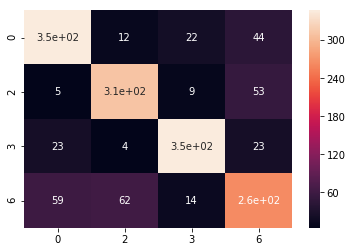

In [50]:
target_names=['0', '2', '3' ,'6']
print(classification_report(y_test, predicted_op_test, target_names=target_names))
cm = confusion_matrix(y_test, predicted_op_test)
plot_confusion_matrix(cm, target_names)

## since train accuracy is greater than cross validation set accuracy, our model might be overfitting. Lets try with l1 regularization to overcome overfitting problem.

In [52]:
logistic_regression_model_l1 = LogisticRegression(penalty='l1',multi_class='ovr')

In [53]:
logistic_regression_model_l1.fit(x_train, y_train)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
predicted_op_l1 = logistic_regression_model_l1.predict(x_train)

In [55]:
train_f1_l1 = f1_score(y_train, predicted_op_l1, average=None)
print('train f1 score using l1: ', train_f1_l1)

train f1 score using l1:  [0.86336757 0.88414634 0.93877551 0.76863   ]


In [56]:
train_accuracy_l1 = accuracy_score(y_train, predicted_op_l1)
print('train accuracy using l1 : ', train_accuracy_l1)

train accuracy using l1 :  0.865


In [57]:
predicted_op_test_l1 = logistic_regression_model_l1.predict(x_test)

In [58]:
test_f1_l1 = f1_score(y_test, predicted_op_test_l1, average=None)
print('test f1 score: ', test_f1_l1)

test f1 score:  [0.80046674 0.81627297 0.8790932  0.67852605]


In [59]:
test_accuracy_l1 = accuracy_score(y_test, predicted_op_test_l1)
print('test accuracy: ', test_accuracy_l1)

test accuracy:  0.79375


In [60]:
np.unique(y_train)

array([0, 2, 3, 6])

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       425
           2       0.81      0.82      0.82       379
           3       0.88      0.88      0.88       397
           6       0.69      0.67      0.68       399

   micro avg       0.79      0.79      0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



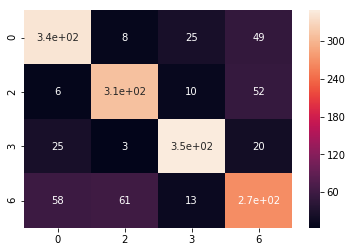

In [61]:
target_names=['0', '2', '3' ,'6']
print(classification_report(y_test, predicted_op_test_l1, target_names=target_names))
cm = confusion_matrix(y_test, predicted_op_test_l1)
plot_confusion_matrix(cm, target_names)

## as we can see test and train accuracy after l1 regularization is same as our previous model so overfitting might not be a problem. Lets try L2 regularization.

In [63]:
logistic_regression_model_l2 = LogisticRegression(penalty='l2',multi_class='ovr')
logistic_regression_model_l2.fit(x_train, y_train)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

test accuracy:  0.79375
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       425
           2       0.80      0.82      0.81       379
           3       0.89      0.87      0.88       397
           6       0.69      0.66      0.67       399

   micro avg       0.79      0.79      0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



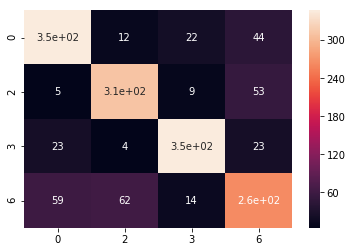

In [64]:
predicted_op_test_l2 = logistic_regression_model_l2.predict(x_test)
test_accuracy_l2 = accuracy_score(y_test, predicted_op_test_l2)
print('test accuracy: ', test_accuracy_l2)
target_names=['0', '2', '3' ,'6']
print(classification_report(y_test, predicted_op_test_l2, target_names=target_names))
cm = confusion_matrix(y_test, predicted_op_test_l2)
plot_confusion_matrix(cm, target_names)

## again same results as our previous models, that means overfitting is not a problem. Accuracy and f1 score will be increased if we will give more data to train our model.

## as f1 score is slighly higher in case of l2 regularization so lets choose this as our primary model and train on the whole data.

In [66]:
logistic_regression_model_l2 = LogisticRegression(penalty='l2',multi_class='ovr')
logistic_regression_model_l2.fit(train_image, train_label)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
predicted_op_test_l2 = logistic_regression_model_l2.predict(test_image)

In [76]:
sz = len(predicted_op_test_l2)

In [73]:
dataframe = pd.DataFrame(columns=['image_index', 'class'])

In [78]:
dataframe['image_index'] = np.array([i for i in range(sz)])

In [80]:
dataframe['class'] = np.array(predicted_op_test_l2)

In [84]:
dataframe.set_index('image_index', inplace=True)

In [85]:
dataframe[:10]

,class
image_index,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [86]:
dataframe.to_csv('shishir_singhal.csv',encoding='utf-8')